# Product Uptake Prediction

In this project, various machine learning models are built and tested in order to forecast the results of a direct marketing campaign conducted by a banking organization.


In [1]:
#import python libraries for data manipulation and visualization
import pandas as pd
import numpy as np

#import other libraries....
import matplotlib.pyplot as plt
import seaborn as sns

! pip install -U imbalanced-learn



# Data Inspection

In [2]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters
data = pd.read_csv('/Users/apple/Downloads/bank.csv',sep=';', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [3]:
#set values in the first row as columns to the data frame
data.rename(columns = data.iloc[0],inplace=True)
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [4]:
#delete the first row 
data.drop(0,inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
# get info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [6]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,67,12,3,4,2,2353,2,2,3,31,12,875,32,292,24,4,2
top,34,management,married,secondary,no,0,yes,no,cellular,20,may,123,1,-1,0,unknown,no
freq,231,969,2797,2306,4445,357,2559,3830,2896,257,1398,27,1734,3705,3705,3705,4000


In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Counting the number of unknown values in the data
data[data =='unknown'].count().to_frame()

,0
age,0
job,38
marital,0
education,187
default,0
balance,0
housing,0
loan,0
contact,1324
day,0


In [9]:
# Number of rows and columns
data.shape

(4521, 17)

In [10]:
# Change data types of numeric columns to either integer or float

my_data =data.astype({'balance':float,'age':int,'day':int,'duration':int,'pdays':int,'previous':int,'campaign':int})
my_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   int64  
 10  month      4521 non-null   object 
 11  duration   4521 non-null   int64  
 12  campaign   4521 non-null   int64  
 13  pdays      4521 non-null   int64  
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 600.6+ KB


# Data Cleansing

In [11]:
# Handling missing values
null_vals = data.isnull().sum()

null_vals[null_vals > 0]

Series([], dtype: int64)

In [12]:
# removing unnecessary columns & rows from the datasets

# Get row indices for rows with the value 'unknown'
unnecessary_cols = my_data[(my_data['education']=='unknown') | (my_data['job']=='unknown')].index
print (unnecessary_cols)

# Drop rows with unknown values
my_data.drop(unnecessary_cols, inplace =True)

# Drop Columns with unknown values
my_data.drop(['contact','poutcome'],axis =1, inplace= True)

print (my_data.shape)

my_data.head()


Int64Index([  21,   28,   50,   96,  133,  134,  140,  143,  150,  151,
            ...
            4226, 4261, 4280, 4317, 4338, 4343, 4429, 4430, 4472, 4509],
           dtype='int64', length=210)
(4311, 15)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
1,30,unemployed,married,primary,no,1787.0,no,no,19,oct,79,1,-1,0,no
2,33,services,married,secondary,no,4789.0,yes,yes,11,may,220,1,339,4,no
3,35,management,single,tertiary,no,1350.0,yes,no,16,apr,185,1,330,1,no
4,30,management,married,tertiary,no,1476.0,yes,yes,3,jun,199,4,-1,0,no
5,59,blue-collar,married,secondary,no,0.0,yes,no,5,may,226,1,-1,0,no


In [13]:
# Check if unnecessary_col has been dropped
my_data[my_data=='unknown'].count().to_frame()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
day,0
month,0


In [14]:
# Converting categorical variables to integers

categories_dummies = pd.get_dummies(my_data,columns=['job', 'marital', 'education', 'default','housing','loan'],drop_first=True )
categories_dummies.head()

,age,balance,day,month,duration,campaign,pdays,previous,y,job_blue-collar,...,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
1,30,1787.0,19,oct,79,1,-1,0,no,0,...,0,0,1,1,0,0,0,0,0,0
2,33,4789.0,11,may,220,1,339,4,no,0,...,0,0,0,1,0,1,0,0,1,1
3,35,1350.0,16,apr,185,1,330,1,no,0,...,0,0,0,0,1,0,1,0,1,0
4,30,1476.0,3,jun,199,4,-1,0,no,0,...,0,0,0,1,0,0,1,0,1,1
5,59,0.0,5,may,226,1,-1,0,no,1,...,0,0,0,1,0,1,0,0,1,0


In [15]:
categories_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 1 to 4521
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4311 non-null   int64  
 1   balance              4311 non-null   float64
 2   day                  4311 non-null   int64  
 3   month                4311 non-null   object 
 4   duration             4311 non-null   int64  
 5   campaign             4311 non-null   int64  
 6   pdays                4311 non-null   int64  
 7   previous             4311 non-null   int64  
 8   y                    4311 non-null   object 
 9   job_blue-collar      4311 non-null   uint8  
 10  job_entrepreneur     4311 non-null   uint8  
 11  job_housemaid        4311 non-null   uint8  
 12  job_management       4311 non-null   uint8  
 13  job_retired          4311 non-null   uint8  
 14  job_self-employed    4311 non-null   uint8  
 15  job_services         4311 non-null   u

# Data Visualization

## Univariate Analysis



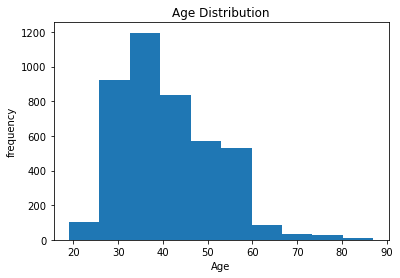

In [16]:
#univariate analysis cells
plt.hist(x='age',data=categories_dummies )
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

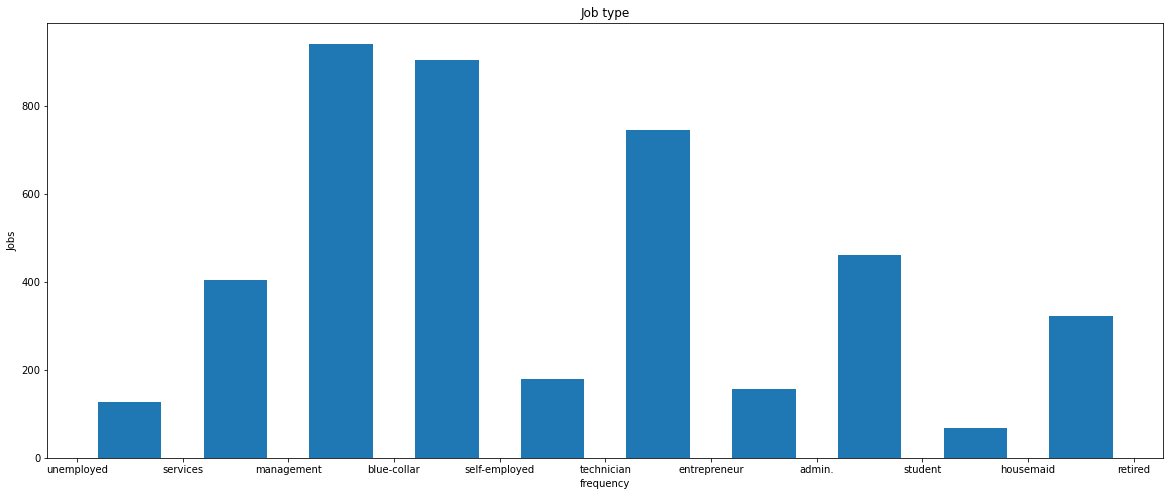

In [17]:
#univariate analysis cells
#plotting job status
plt.figure(figsize= (20,8))
plt.hist(x='job',data=my_data,orientation='vertical', rwidth=0.6)
plt.xlabel('frequency')
plt.ylabel('Jobs')
plt.title('Job type')
plt.show()

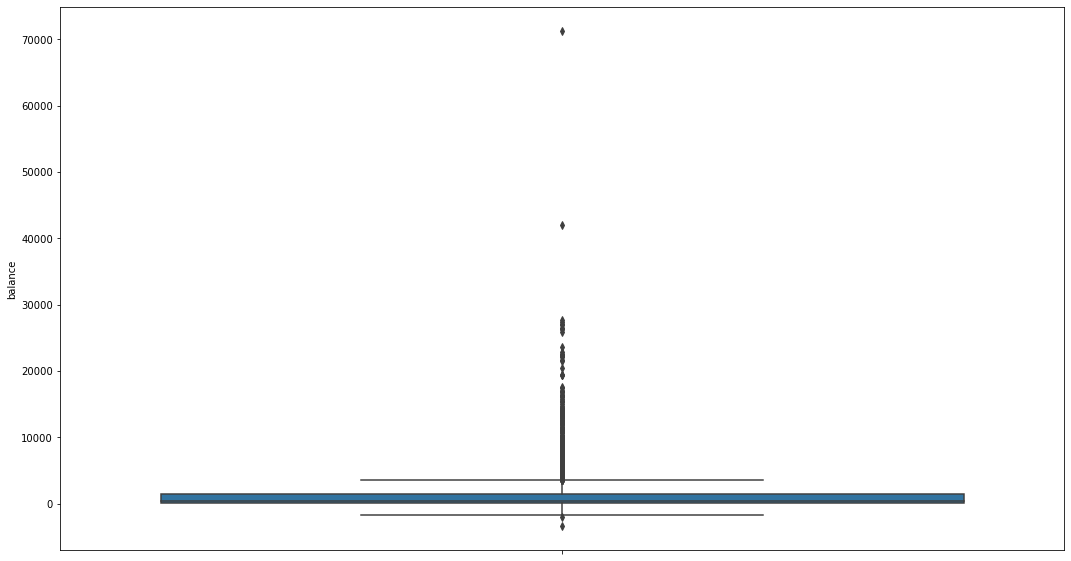

In [18]:
#univariate analysis cells
%matplotlib inline

fig, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(y='balance', data=my_data)
plt.show()

## Bivariate Analysis

Text(0, 0.5, 'Balance')

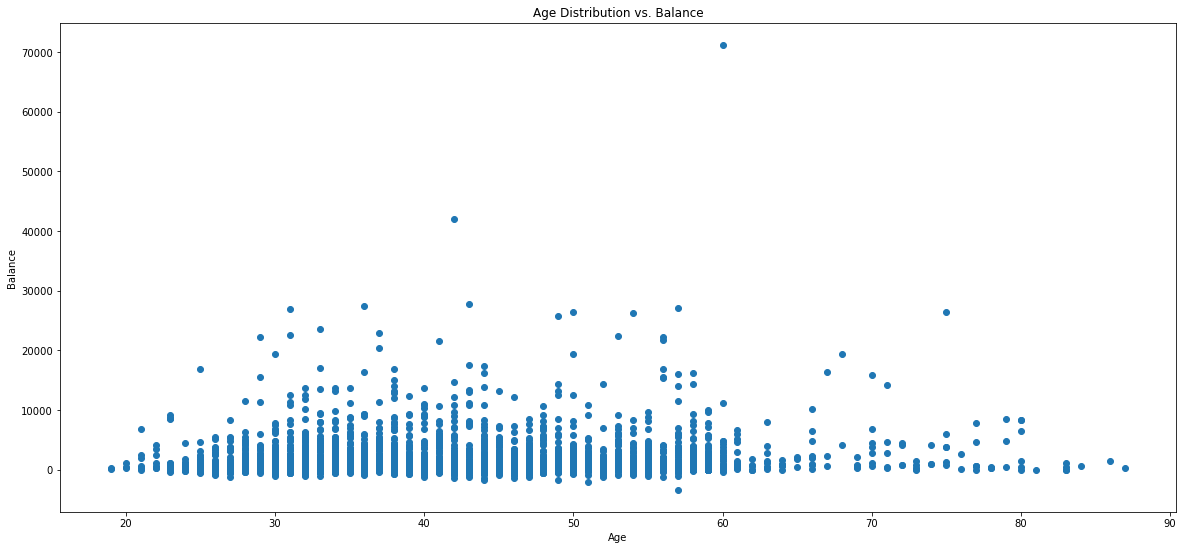

In [19]:
#bivariate analysis cells
plt.figure(figsize=(20,9))
plt.scatter(my_data.age, my_data.balance)
plt.title('Age Distribution vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')


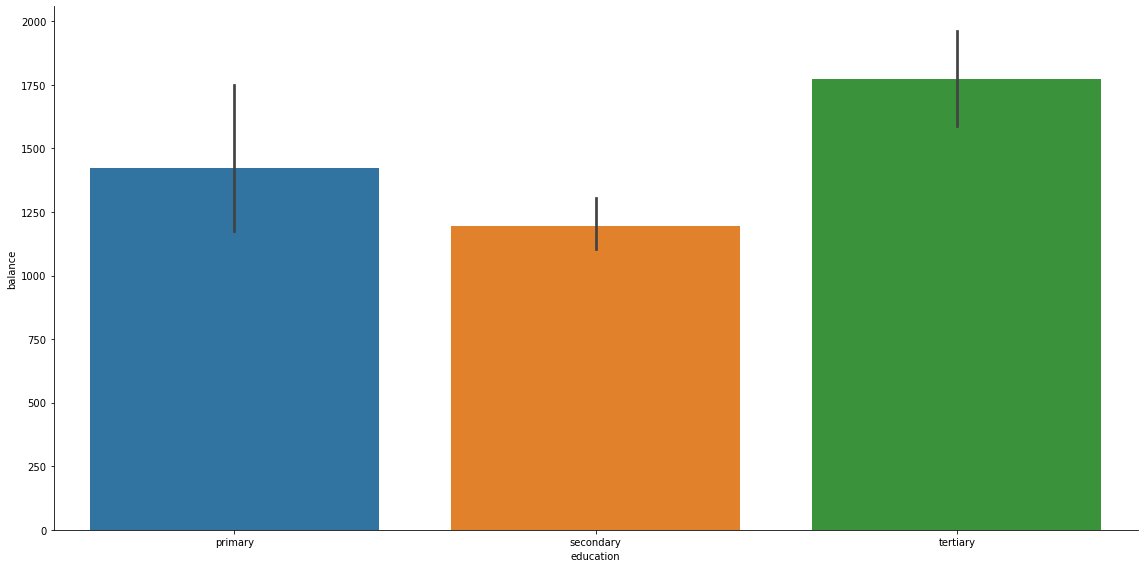

In [20]:
#bivariate analysis cells
#plotting Education Vs balance
education = ['primary', 'secondary', 'tertiary']
sns.catplot(data=my_data,x='education',y='balance', order= education,height=8, aspect=2, kind = 'bar')
plt.show()

## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

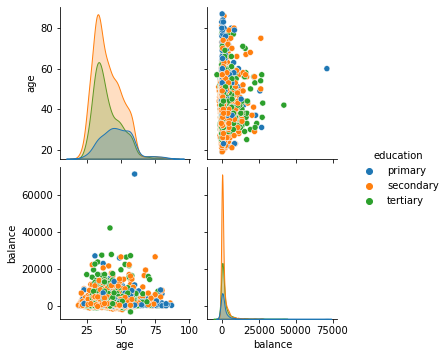

In [21]:
#multivariate analysis cells

sns.pairplot(data= my_data[['age','job','education','balance']], hue ='education')

In [22]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Modelling

In this section, you will train and evaluate your models


## Select Target

In [23]:
y = categories_dummies.y

In [24]:
x = categories_dummies.drop(columns=['day', 'month','y'])


In [25]:
data = pd.concat([data, categories_dummies], axis=1)
print(data.shape)
data.head()

(4521, 43)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## Select Features

In [26]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age', 'balance', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes'],
      dtype='object')

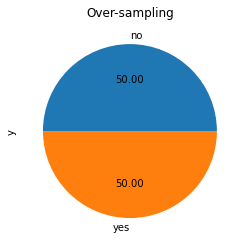

In [27]:
from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler(sampling_strategy="not majority")
x_res, y_res = ROS.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

## Import ML algorithms and initialize them

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


## Train and Test the models

In [31]:
LR = LogisticRegression()

In [32]:
KN = KNeighborsClassifier()

In [33]:
DC = DecisionTreeClassifier()

In [34]:
RF = RandomForestClassifier()

In [35]:
my_model = [LR,KN,DC,RF]

In [36]:
def trainer(models,x_train,y_train,x_test,y_test):
    #fit your model
    models.fit(x_train,y_train)
    #predict on the fitted model
    prediction = model.predict(x_test)
    #print evaluation metric
    print('\nFor {}, scores are\n {} '.format(models.__class__.__name__,classification_report(y_test, prediction)))
    print('\nFor {}, Confusion Matrix is\n {} '.format(models.__class__.__name__,confusion_matrix(y_test, prediction)))


In [37]:
for model in my_model:
    trainer(model,x_train,y_train,x_test,y_test)

    
    

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For LogisticRegression, scores are
               precision    recall  f1-score   support

          no       0.90      0.97      0.94      1526
         yes       0.47      0.18      0.26       199

    accuracy                           0.88      1725
   macro avg       0.69      0.58      0.60      1725
weighted avg       0.85      0.88      0.86      1725
 

For LogisticRegression, Confusion Matrix is
 [[1486   40]
 [ 163   36]] 

For KNeighborsClassifier, scores are
               precision    recall  f1-score   support

          no       0.91      0.96      0.93      1526
         yes       0.46      0.26      0.33       199

    accuracy                           0.88      1725
   macro avg       0.68      0.61      0.63      1725
weighted avg       0.86      0.88      0.86      1725
 

For KNeighborsClassifier, Confusion Matrix is
 [[1464   62]
 [ 147   52]] 

For DecisionTreeClassifier, scores are
               precision    recall  f1-score   support

          no       0.9

## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

1. The accuracy score for the logistic regression model is 0.88, the precision score is 0.85, and the recall score is 0.88.

2. The accuracy score for the KNeighborsClassifier is 0.88, the precision score is 0.86, and the recall score is 0.88.

3. The DecisionTree has a score of 0.84 for accuracy, 0.85 for precision, and 0.84 for recall.

4. The RandomForestClassifier has a score of 0.89 for accuracy, 0.87 for precision, and 0.89 for recall.

## Summary
What model should be deployed to production? Any other comments?

With an accuracy score of 0.89 and an F1 score of 0.88, the RandomForestClassifier scored better than the other models and should be used.